In [1]:
import sklearn
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

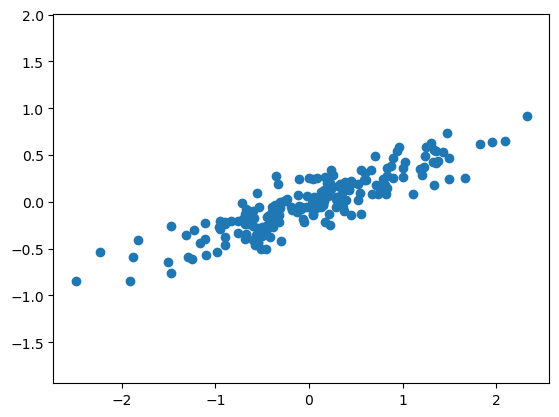

In [2]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2,2), rng.randn(2, 200)).T
plt.scatter(X[:,0],X[:,1])
plt.axis('equal');

In [3]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(X)

PCA(n_components=2)

In [4]:
print(pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [5]:
print (pca.explained_variance_)

[0.7625315 0.0184779]


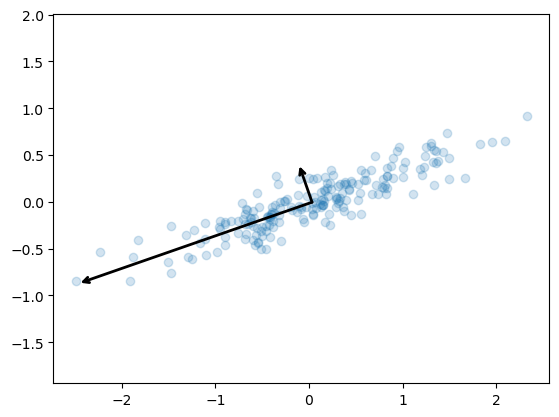

In [6]:
def draw_vector(v0, v1, ax = None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                   linewidth =2,
                   shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops = arrowprops)
#plt data
plt.scatter(X[:,0], X[:,1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_+ v)
plt.axis('equal');

In [7]:
# reduce to one dimentional array using PCA - PCA as dimentionality reduction algorith

In [8]:
pca = PCA(n_components =1 )
pca.fit(X)
X_pca = pca.transform(X) #transform without loosing important attribute
print("original shape:" , X.shape)
print("Transformed shape:" , X_pca.shape)

original shape: (200, 2)
Transformed shape: (200, 1)


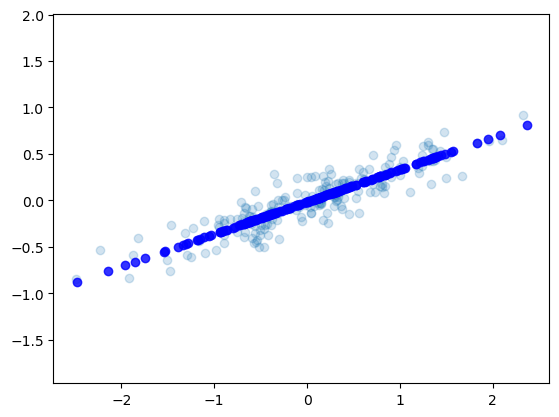

In [9]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:,0], X[:,1], alpha = 0.2)
plt.scatter(X_new[:,0], X_new[:,1], color = 'b', alpha = 0.8)
plt.axis('equal');

In [10]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [11]:
pca = PCA(2) # project from 64 to 2 dimentions
pca.fit(digits.data)
projected = pca.transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


C:\Users\Biggest\AppData\Local\Temp\ipykernel_24392\975759448.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('nipy_spectral', 10))


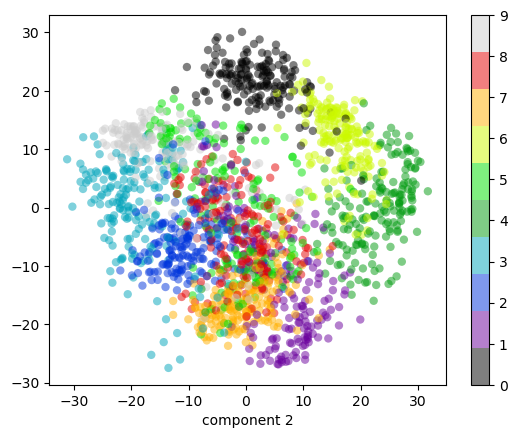

In [12]:
plt.scatter(projected[:, 0], projected[:, 1],
            c = digits.target, edgecolor = 'none', alpha = 0.5, 
            cmap = plt.cm.get_cmap('nipy_spectral', 10))
plt.xlabel('component 1')
plt.xlabel('component 2')
plt.colorbar();

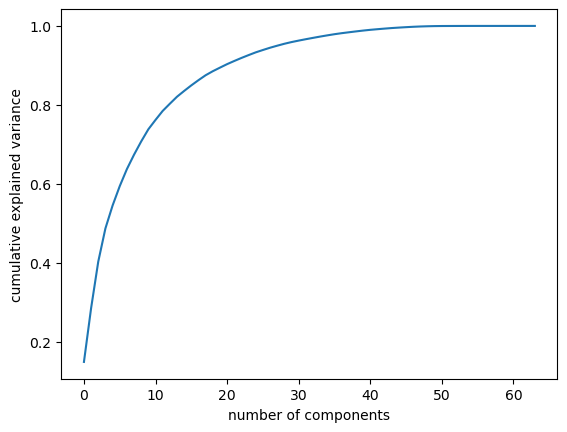

In [14]:
# choosing the number of components
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');